<a href="https://colab.research.google.com/github/feguedes/Projetos-de-DS/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Vancouver, Canadá*

Sabia que o [Airbnb](https://www.airbnb.com.br/) não possui nenhum Hotel e é considerado a maior empresa Hoteleira hoje em dia.

Facilitando a conexão entre quem procura por um lugar para se hospedar e a pessoa que tem um imovel e gostaria de locar por dias, semanas ou até meses, com uma abordagem moderna e de facil utilização diferente de uma rede de hotel tendo assim uma alternativa para locais que se encaixam mais com o perfil de cada pessoa.

Com uma abordagem atual e transparente do Airbnb é possivel ter acesso aos dados do site de algumas cidades. No portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), aqui você consegue os dados para analisar e desenvolver projetos.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancounver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2021-04-12/visualisations/listings.csv")

## Análise dos Dados
Aqui vamos criar um dicionario para melhor visualização e compreenção sobre os dados trazidos.

**Dicionário das variáveis**

* `id` - indetificação gerado para o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - identifição do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - coluna sem dados válidos
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28872,-123.12046,Entire home/apt,150,90,16,2017-02-26,0.14,40,346
1,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,85,30,430,2021-01-01,3.27,1,98
2,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,145,30,88,2020-10-31,0.73,1,203
3,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,140,3,33,2020-02-07,0.26,1,123
4,16254,Close to PNE/Hastings Park and East Village,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,195,3,5,2019-08-19,0.15,1,289


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 4299
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.186090
last_review                       0.186090
host_name                         0.030007
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

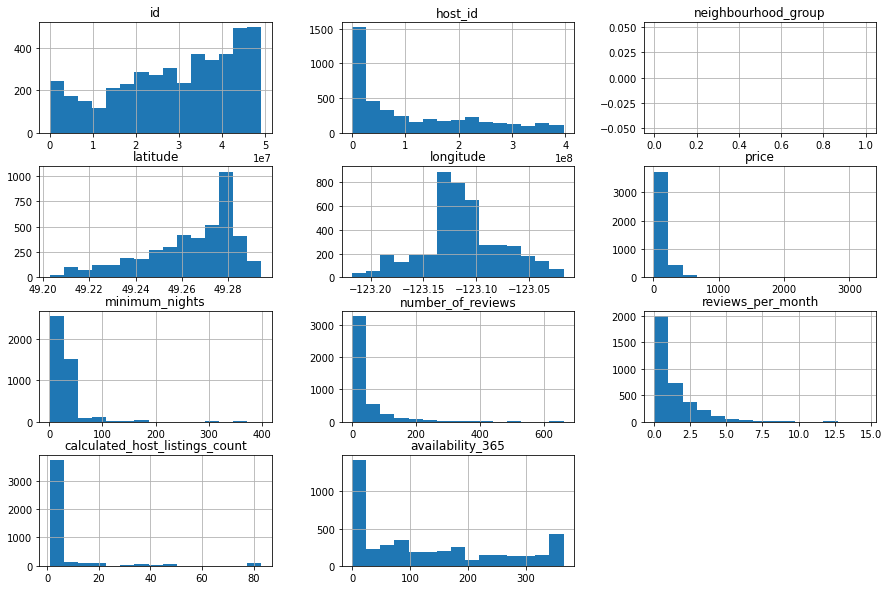

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4299.000000,4299.000000,4299.000000,3499.000000,4299.000000,4299.000000
mean,151.511980,19.002326,34.227960,1.241252,5.643871,126.424750
std,152.606141,34.112295,59.378906,1.392151,13.494667,125.528629
min,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,83.000000,2.000000,1.000000,0.250000,1.000000,0.000000
50%,115.000000,4.000000,9.000000,0.740000,1.000000,89.000000
75%,175.000000,30.000000,42.000000,1.760000,3.000000,225.000000
max,3250.000000,399.000000,662.000000,14.660000,83.000000,365.000000


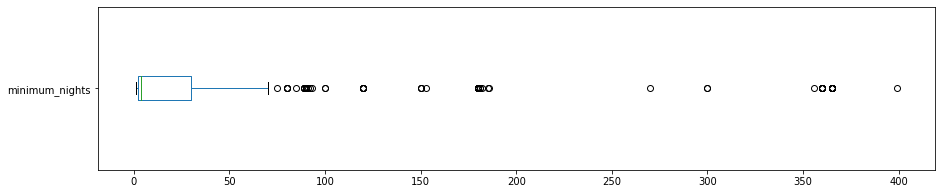

minimum_nights: valores acima de 30:
377 entradas
8.7695%


In [18]:
# ver a média da coluna `price``
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

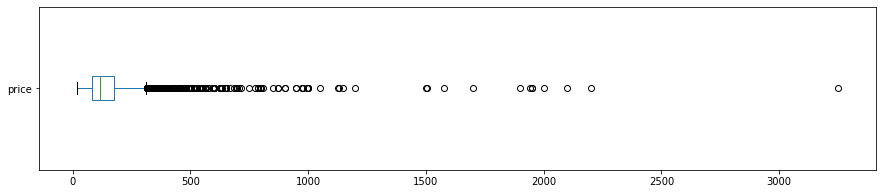


price: valores acima de 1500
11 entradas
0.2559%


In [19]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

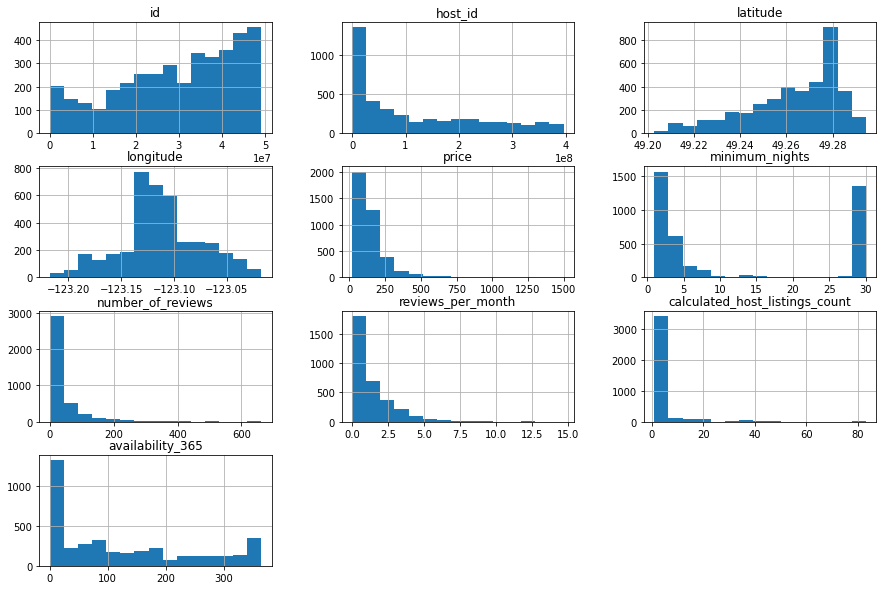

In [20]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

In [21]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.108725,-0.062676,-0.074069,-0.087299,0.043008
minimum_nights,-0.108725,1.000000,-0.221983,-0.320840,0.280335,0.199273
number_of_reviews,-0.062676,-0.221983,1.000000,0.702294,-0.159279,0.061735
reviews_per_month,-0.074069,-0.320840,0.702294,1.000000,-0.183378,0.042963
calculated_host_listings_count,-0.087299,0.280335,-0.159279,-0.183378,1.000000,0.030550
availability_365,0.043008,0.199273,0.061735,0.042963,0.030550,1.000000


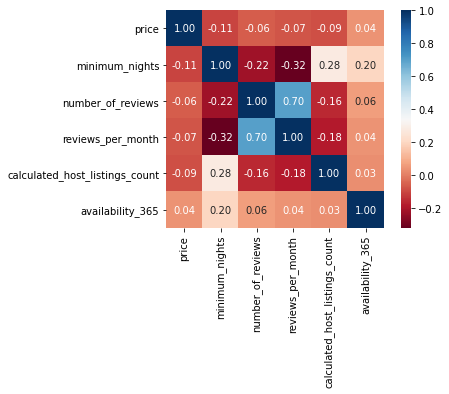

In [22]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [23]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3034
Private room        858
Shared room          18
Hotel room            4
Name: room_type, dtype: int64

In [24]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.775166
Private room       0.219213
Shared room        0.004599
Hotel room         0.001022
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [25]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kitsilano            202.307453
West Point Grey      179.885714
Dunbar Southlands    169.639344
Downtown             164.521288
Arbutus Ridge        163.048387
Downtown Eastside    153.717073
Fairview             150.911290
Strathcona           149.529412
Riley Park           144.871560
Kerrisdale           142.829268
Name: price, dtype: float64

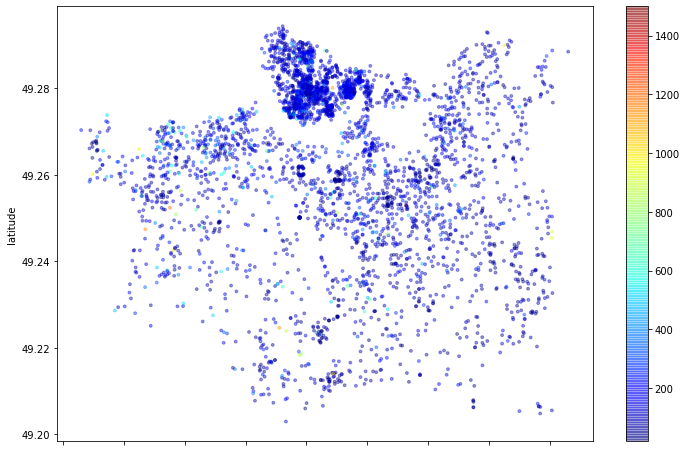

In [27]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [28]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

19.002326122354035

## Conclusões


Podemos ver que os dados utilizados são uma versão resumida, assim deixando alguns pontos não tão acurados.
Essa foi uma análise sobre as prorpriedades disponiveis para locação pelo Airbnb na cidade de Vancouver, existem alguns outliers para algumas variáveis mas a intenção é um panorama sobre os dados obtidos.
Para uma análise mais exploratória será necessario a utilização do dataset completo que possui 106 atributos disponíveis.
